In [1]:
import pandas as pd

# Load the CSV file
file_path = 'Body Measurements _ original_CSV.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
0,1.0,30,22,18,20,18,14,22,22,25,25,22,52
1,1.0,28,19,22,17,18,21,25,28,23,25,20,56
2,2.0,27,21,18,16,14,10,15,21,18,14,18,53
3,1.0,29,20,20,18,11,19,14,24,21,20,21,45
4,2.0,28,16,14,18,13,11,30,25,22,32,13,47


In [2]:
# Checking for missing values
missing_values = data.isnull().sum()

missing_values


Gender               1
Age                  0
HeadCircumference    0
ShoulderWidth        0
ChestWidth           0
Belly                0
Waist                0
Hips                 0
ArmLength            0
ShoulderToWaist      0
WaistToKnee          0
LegLength            0
TotalHeight          0
dtype: int64

In [3]:
# Dropping the row with the missing value in the 'Gender' column
data_cleaned = data.dropna(subset=['Gender'])

# Checking if the row has been successfully dropped
missing_values_cleaned = data_cleaned.isnull().sum()

missing_values_cleaned, data_cleaned.shape


(Gender               0
 Age                  0
 HeadCircumference    0
 ShoulderWidth        0
 ChestWidth           0
 Belly                0
 Waist                0
 Hips                 0
 ArmLength            0
 ShoulderToWaist      0
 WaistToKnee          0
 LegLength            0
 TotalHeight          0
 dtype: int64,
 (715, 13))

In [4]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numeric columns for standardization
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_numeric = data_cleaned[numeric_columns]

# Excluding 'Gender' and 'Age' from standardization as they are categorical/ordinal
columns_to_standardize = data_numeric.columns.drop(['Gender', 'Age'])

# Applying standardization
scaler = StandardScaler()
data_cleaned[columns_to_standardize] = scaler.fit_transform(data_cleaned[columns_to_standardize])

# Displaying the first few rows of the standardized data
data_cleaned.head()


C:\Users\decroux paul\AppData\Local\Temp\ipykernel_7928\3808167577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[columns_to_standardize] = scaler.fit_transform(data_cleaned[columns_to_standardize])


,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
0,1.0,30,0.380728,0.773032,1.021120,-0.216975,-0.599703,0.298617,0.592977,1.319187,1.621373,-0.610213,0.318822
1,1.0,28,-0.420706,1.613028,0.456463,-0.216975,0.198572,0.641882,1.709200,0.947255,1.621373,-0.862557,0.647885
2,2.0,27,0.113583,0.773032,0.268245,-0.611727,-1.055859,-0.502335,0.406940,0.017426,-0.492351,-1.114901,0.401088
3,1.0,29,-0.153561,1.193030,0.644682,-0.907791,-0.029507,-0.616757,0.965051,0.575324,0.660589,-0.736385,-0.257037
4,2.0,28,-1.222140,-0.066965,0.644682,-0.710415,-0.941820,1.213990,1.151088,0.761290,2.966471,-1.745761,-0.092506


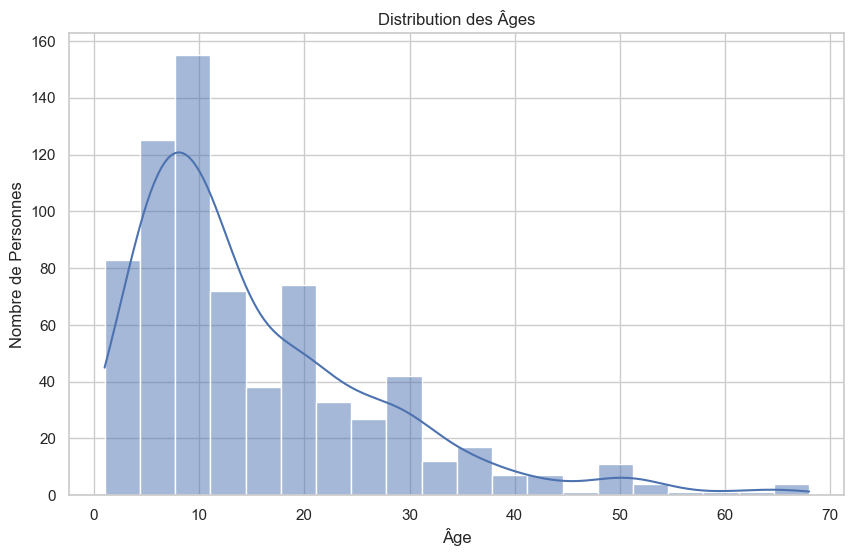

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Age'], bins=20, kde=True)
plt.title('Distribution des Âges')
plt.xlabel('Âge')
plt.ylabel('Nombre de Personnes')
plt.show()


c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

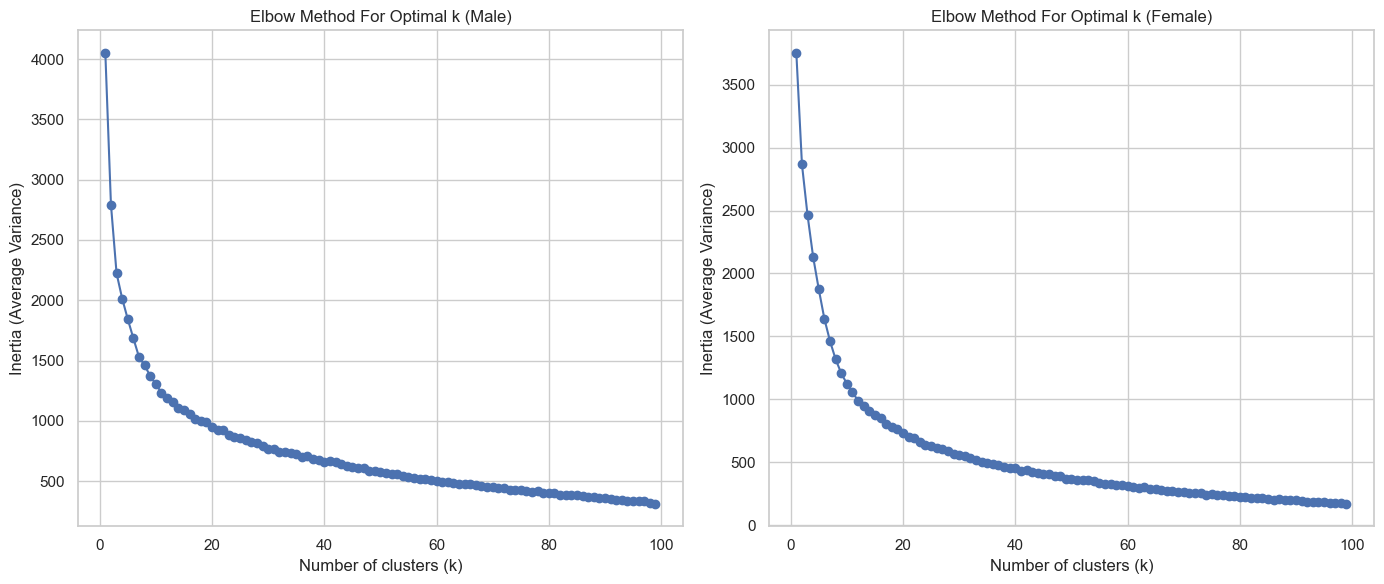

In [7]:
from sklearn.cluster import KMeans
import numpy as np

# Function to calculate average variance for different values of k
def calculate_inertia(data, k_range):
    inertia = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)
    return inertia

# Define range of k
k_range = range(1, 100)

# Splitting the dataset based on gender
data_male = data_cleaned[data_cleaned['Gender'] == 1].drop(['Gender', 'Age'], axis=1)
data_female = data_cleaned[data_cleaned['Gender'] == 2].drop(['Gender', 'Age'], axis=1)

# Calculate average variance for each k for both male and female datasets
inertia_male = calculate_inertia(data_male, k_range)
inertia_female = calculate_inertia(data_female, k_range)

# Plotting the Elbow method results
plt.figure(figsize=(14, 6))

# Male dataset
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_male, marker='o')
plt.title('Elbow Method For Optimal k (Male)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Average Variance)')

# Female dataset
plt.subplot(1, 2, 2)
plt.plot(k_range, inertia_female, marker='o')
plt.title('Elbow Method For Optimal k (Female)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Average Variance)')

plt.tight_layout()
plt.show()


In [9]:
# Function to create and fit KMeans model and return labels
def kmeans_labels(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    return kmeans.labels_


c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\decroux paul\AppData\Local\Temp\ipykernel_7928\3833560424.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_male_with_age['Cluster'] = labels_male_with_age
C:\Users\decroux paul\AppData\Local\T

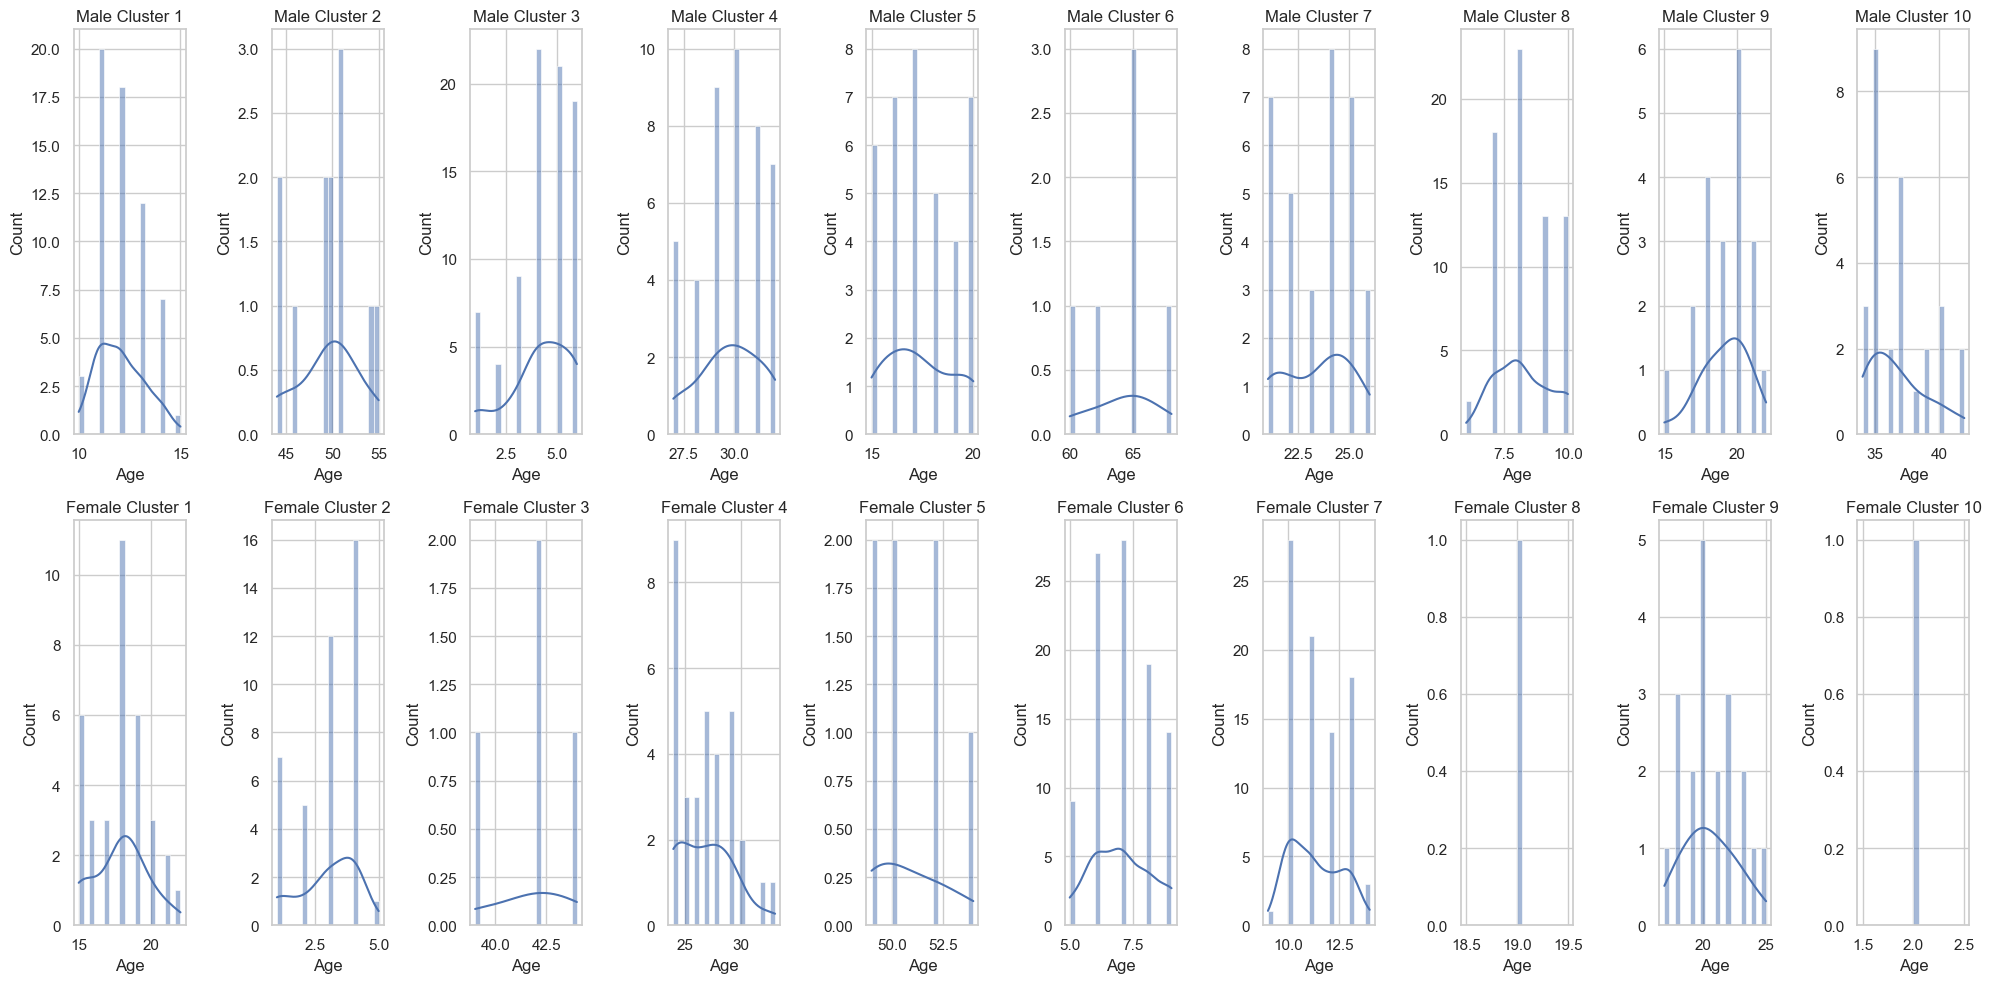

In [10]:
# Adding back the 'Age' column to the gender-specific datasets
data_male_with_age = data_cleaned[data_cleaned['Gender'] == 1]
data_female_with_age = data_cleaned[data_cleaned['Gender'] == 2]

# applying KMeans with 10 clusters for each gender dataset including 'Age'
labels_male_with_age = kmeans_labels(data_male_with_age.drop(['Gender'], axis=1), 10)
labels_female_with_age = kmeans_labels(data_female_with_age.drop(['Gender'], axis=1), 10)

# Adding the cluster labels to the datasets
data_male_with_age['Cluster'] = labels_male_with_age
data_female_with_age['Cluster'] = labels_female_with_age

# Plotting age distribution for each cluster
plt.figure(figsize=(20, 10))

# Male clusters
for i in range(10):
    plt.subplot(2, 10, i+1)
    sns.histplot(data_male_with_age[data_male_with_age['Cluster'] == i]['Age'], bins=20, kde=True)
    plt.title(f'Male Cluster {i+1}')
    plt.xlabel('Age')
    plt.ylabel('Count')

# Female clusters
for i in range(10):
    plt.subplot(2, 10, i+11)
    sns.histplot(data_female_with_age[data_female_with_age['Cluster'] == i]['Age'], bins=20, kde=True)
    plt.title(f'Female Cluster {i+1}')
    plt.xlabel('Age')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [11]:
# Identifying clusters with only one individual for both male and female datasets
clusters_to_remove_male = data_male_with_age['Cluster'].value_counts()[data_male_with_age['Cluster'].value_counts() == 1].index
clusters_to_remove_female = data_female_with_age['Cluster'].value_counts()[data_female_with_age['Cluster'].value_counts() == 1].index

# Removing the identified single-individual clusters
data_male_cleaned = data_male_with_age[~data_male_with_age['Cluster'].isin(clusters_to_remove_male)]
data_female_cleaned = data_female_with_age[~data_female_with_age['Cluster'].isin(clusters_to_remove_female)]

# Function to renumber clusters based on the ascending order of average age
def renumber_clusters(data):
    cluster_avg_age = data.groupby('Cluster')['Age'].mean().sort_values().index
    mapping = {old: new for new, old in enumerate(cluster_avg_age)}
    data['Cluster'] = data['Cluster'].map(mapping)
    return data

# Renumbering clusters
data_male_renumbered = renumber_clusters(data_male_cleaned)
data_female_renumbered = renumber_clusters(data_female_cleaned)

# Displaying the first few rows of the renumbered datasets
data_male_renumbered.head(), data_female_renumbered.head()


C:\Users\decroux paul\AppData\Local\Temp\ipykernel_7928\1802376904.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = data['Cluster'].map(mapping)


(   Gender  Age  HeadCircumference  ShoulderWidth  ChestWidth     Belly    
 0     1.0   30           0.380728       0.773032     1.021120 -0.216975  \
 1     1.0   28          -0.420706       1.613028     0.456463 -0.216975   
 3     1.0   29          -0.153561       1.193030     0.644682 -0.907791   
 8     1.0   23          -1.222140       0.353033     1.021120 -0.216975   
 9     1.0   31          -1.489284       1.193030     2.526870 -0.216975   
 
      Waist      Hips   ArmLength   ShoulderToWaist   WaistToKnee   LegLength   
 0 -0.599703  0.298617    0.592977          1.319187      1.621373  -0.610213  \
 1  0.198572  0.641882    1.709200          0.947255      1.621373  -0.862557   
 3 -0.029507 -0.616757    0.965051          0.575324      0.660589  -0.736385   
 8  0.312611 -0.159070   -0.709283          1.505153      0.660589  -0.988729   
 9  8.181314 -0.273492   -0.523246          0.575324      0.852746  -0.988729   
 
    TotalHeight  Cluster  
 0     0.318822        6  


In [12]:
# Renaming the 'Cluster' column to 'Class' in both datasets
data_male_renumbered.rename(columns={'Cluster': 'Class'}, inplace=True)
data_female_renumbered.rename(columns={'Cluster': 'Class'}, inplace=True)

# Saving the datasets to CSV files
male_csv_path = 'male_clustered_data.csv'
female_csv_path = 'female_clustered_data.csv'

data_male_renumbered.to_csv(male_csv_path, index=False)
data_female_renumbered.to_csv(female_csv_path, index=False)

male_csv_path, female_csv_path


C:\Users\decroux paul\AppData\Local\Temp\ipykernel_7928\3341187951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_female_renumbered.rename(columns={'Cluster': 'Class'}, inplace=True)


('male_clustered_data.csv', 'female_clustered_data.csv')